## Objective

Objective: The objective of this project is to predict the bank customer churn and find out if any of these factors [age, credit_score, balance, tenure, credit_card, num_products, estimated_salary] are a good predictor of churn or not. 

The objective of this analysis is to identify the factors that contribute to customer churn in the bank and develop a predictive model to accurately predict which customers are most likely to churn, in order to develop effective retention strategies and improve customer satisfaction.

"Hypothesis: There is a significant relationship between credit_score, length of time with the bank (tenure), balance, estimated_salary & the number of products/services used by customers, and the likelihood of churn. Additionally, demographic factors such as age, gender, and country may also play a role in customer churn."

This hypothesis can be tested by analyzing the dataset to determine the correlation between these variables and customer churn, and by building a predictive model to identify the key drivers of churn. The results of this analysis can help the bank to develop targeted retention strategies to reduce churn and improve customer satisfaction.



## Import the dependencies

In [1]:
# Import the following dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
from plotly.subplots import make_subplots
import seaborn as sns
import plotly.graph_objects as go
import statsmodels.formula.api as smf



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

## Loading the data

In [2]:
# Import the csv file into a pandas dataframe
df = pd.read_csv('C:\\Rohan\\SharpestMinds - Projects\\Bank Customer Churn Prediction.csv')


## Understanding the data

In [3]:
# Obtain the first 5 rows of this dataframe
df.head()

customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0

In [4]:
# Obtain the last 5 rows of this dataframe
df.tail()

customer_id  credit_score  country  gender  age  tenure    balance  \
9995     15606229           771   France    Male   39       5       0.00   
9996     15569892           516   France    Male   35      10   57369.61   
9997     15584532           709   France  Female   36       7       0.00   
9998     15682355           772  Germany    Male   42       3   75075.31   
9999     15628319           792   France  Female   28       4  130142.79   

      products_number  credit_card  active_member  estimated_salary  churn  
9995                2            1              0          96270.64      0  
9996                1            1              1         101699.77      0  
9997                1            0              1          42085.58      1  
9998                2            1              0          92888.52      1  
9999                1            1              0          38190.78      0

In [5]:
# Obtain the dimensions of this dataframe
df.shape

(10000, 12)

As we can see from here that this dataset has about 10000 rows and 12 attributes

In [6]:
# Obtain all the columns from this dataframe
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [7]:
# Obtain the data types for each of the attributes in this data
df.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [8]:
# Obtain more info for each of the attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


## Visualizing missing values

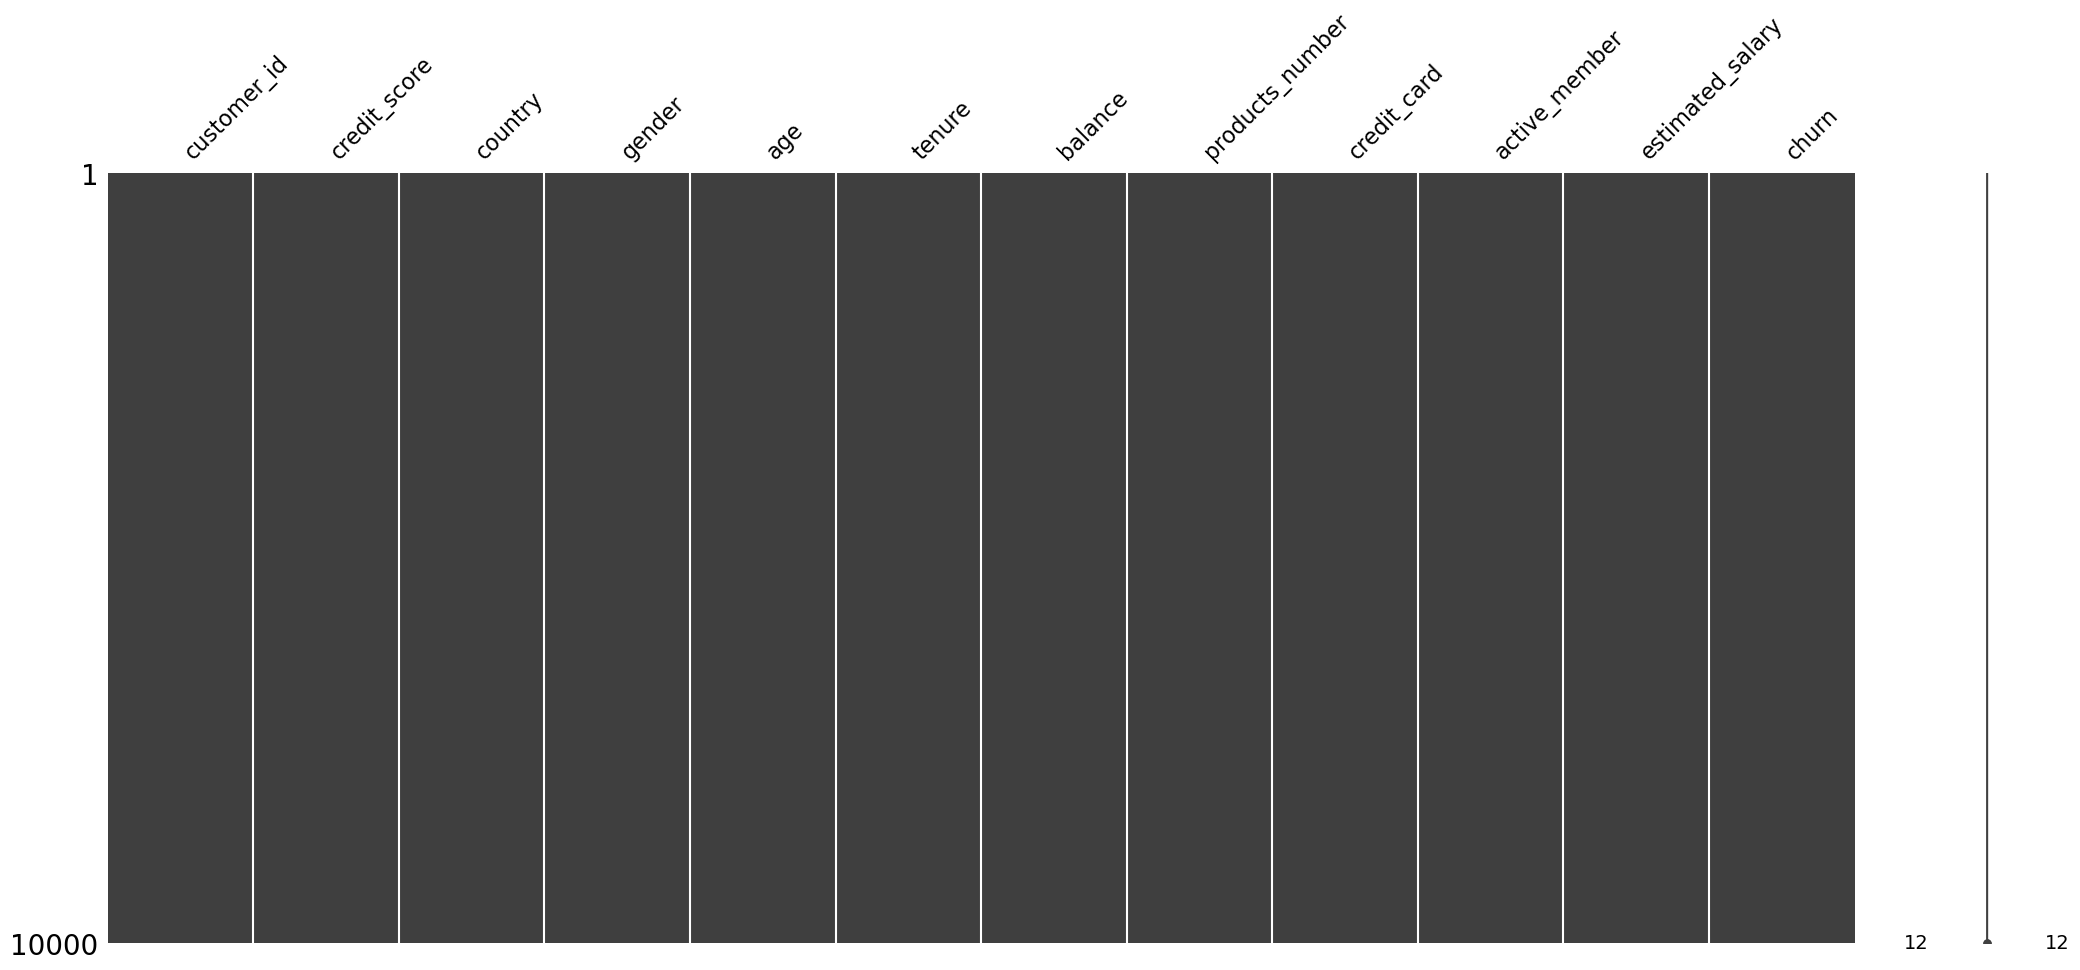

In [9]:
# Visualize missing values as a matrix
msno.matrix(df);

Using this matrix we can very quickly find the pattern of missingness in the dataset.

From the above visualisation we can observe that it has no peculiar pattern that stands out. In fact there is no missing data.

In [10]:
# Obtain the number of missing values for each of the attributes
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

We can observe that this dataframe has no missing values

In [11]:
# Find the number of duplicate records in this dataframe
num_duplicates = df.duplicated().sum()

print(f'There are {num_duplicates} duplicate rows in the DataFrame.')

There are 0 duplicate rows in the DataFrame.


## Outlier Detection

<Axes: xlabel='age'>

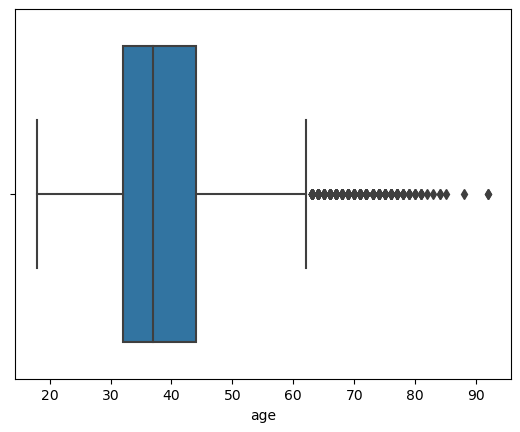

In [12]:
# Create a boxplot for the attribute "age"
sns.boxplot(x=df['age'])

In [13]:
# Find the exact number of outliers existing for this particular attribute of this dataframe
outliers = df['age'][df['age'] > df['age'].quantile(0.75) + 1.5*(df['age'].quantile(0.75) - df['age'].quantile(0.25))]
num_outliers = len(outliers)

print(f'There are {num_outliers} outliers in the column age.')

There are 359 outliers in the column age.


<Axes: xlabel='credit_score'>

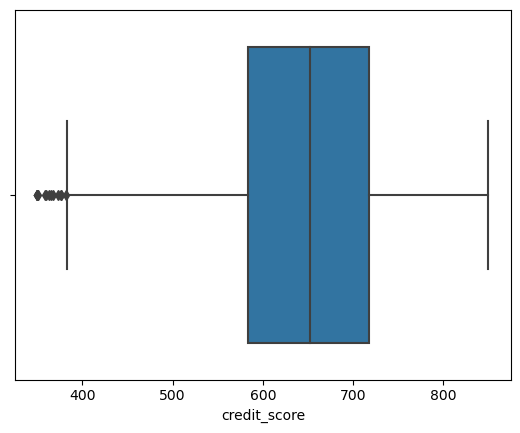

In [14]:
# Find the number of outliers existing for the attribute "credit_score"
sns.boxplot(x=df['credit_score'])

In [15]:
outliers = df['credit_score'][df['credit_score'] > df['credit_score'].quantile(0.75) + 1.5*(df['credit_score'].quantile(0.75) - df['credit_score'].quantile(0.25))]
num_outliers = len(outliers)

print(f'There are {num_outliers} outliers in the column credit score.')

There are 0 outliers in the column credit score.


<Axes: xlabel='tenure'>

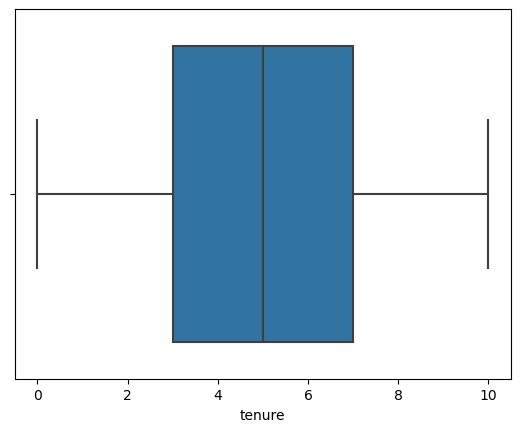

In [16]:
# Find the number of outliers for the attribute "tenure"
sns.boxplot(x=df['tenure'])

In [17]:
outliers = df['tenure'][df['tenure'] > df['tenure'].quantile(0.75) + 1.5*(df['tenure'].quantile(0.75) - df['tenure'].quantile(0.25))]
num_outliers = len(outliers)

print(f'There are {num_outliers} outliers in the column tenure.')

There are 0 outliers in the column tenure.


<Axes: xlabel='estimated_salary'>

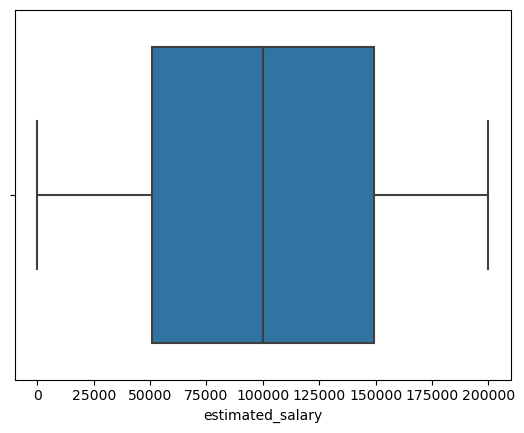

In [18]:
# Find the number of outliers existing for the attribute "estimated_salary"
sns.boxplot(x=df['estimated_salary'])

In [19]:
outliers = df['estimated_salary'][df['estimated_salary'] > df['estimated_salary'].quantile(0.75) + 1.5*(df['estimated_salary'].quantile(0.75) - df['tenure'].quantile(0.25))]
num_outliers = len(outliers)

print(f'There are {num_outliers} outliers in the column estimated_salary.')

There are 0 outliers in the column estimated_salary.


## Data Manipulation

In [20]:
# Drop the attribute "customer_id"
df = df.drop(['customer_id'], axis = 1)
df.head()

credit_score country  gender  age  tenure    balance  products_number  \
0           619  France  Female   42       2       0.00                1   
1           608   Spain  Female   41       1   83807.86                1   
2           502  France  Female   42       8  159660.80                3   
3           699  France  Female   39       1       0.00                2   
4           850   Spain  Female   43       2  125510.82                1   

   credit_card  active_member  estimated_salary  churn  
0            1              1         101348.88      1  
1            0              1         112542.58      0  
2            1              0         113931.57      1  
3            0              0          93826.63      0  
4            1              1          79084.10      0

In [21]:
# Obtain the descriptive statistics for some of the numerical attributes in this dataset
numerical_cols = ['age', 'credit_score', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary']
df[numerical_cols].describe()

age  credit_score        tenure        balance  \
count  10000.000000  10000.000000  10000.000000   10000.000000   
mean      38.921800    650.528800      5.012800   76485.889288   
std       10.487806     96.653299      2.892174   62397.405202   
min       18.000000    350.000000      0.000000       0.000000   
25%       32.000000    584.000000      3.000000       0.000000   
50%       37.000000    652.000000      5.000000   97198.540000   
75%       44.000000    718.000000      7.000000  127644.240000   
max       92.000000    850.000000     10.000000  250898.090000   

       products_number  credit_card  active_member  estimated_salary  
count     10000.000000  10000.00000   10000.000000      10000.000000  
mean          1.530200      0.70550       0.515100     100090.239881  
std           0.581654      0.45584       0.499797      57510.492818  
min           1.000000      0.00000       0.000000         11.580000  
25%           1.000000      0.00000       0.000000      51002.110000  
50%           1.000000      1.00000       1.000000     100193.915000  
75%           2.000000      1.00000       1.000000     149388.247500  
max           4.000000      1.00000       1.000000     199992.480000

In [22]:
# Obtain the number of unique values existing for each of the attributes
df.nunique()

credit_score         460
country                3
gender                 2
age                   70
tenure                11
balance             6382
products_number        4
credit_card            2
active_member          2
estimated_salary    9999
churn                  2
dtype: int64

In [23]:
# Obtain the top 10 customers with the highest estimated salaries
df.nlargest(10, 'estimated_salary')

credit_score  country  gender  age  tenure    balance  products_number  \
6646           685    Spain  Female   42       2       0.00                2   
3580           639  Germany  Female   41       5   98635.77                1   
4417           608    Spain    Male   27       4  153325.10                1   
9096           569   France    Male   37       9  178755.84                1   
8926           620   France    Male   28       8       0.00                2   
5958           540   France  Female   40       3  165298.12                1   
1378           715    Spain  Female   35       4   40169.88                2   
6402           719   France    Male   36       3  155423.17                1   
8088           541  Germany  Female   39       9  100116.67                1   
6125           501  Germany  Female   34       7   93244.42                1   

      credit_card  active_member  estimated_salary  churn  
6646            0              0         199992.48      0  
3580            1              0         199970.74      0  
4417            1              1         199953.33      0  
9096            1              0         199929.17      0  
8926            1              1         199909.32      0  
5958            0              1         199862.75      0  
1378            1              1         199857.47      0  
6402            1              1         199841.32      0  
8088            1              1         199808.10      1  
6125            0              1         199805.63      0

In [24]:
# Convert the data type for the attribute "estimated_salary" to numeric
df['estimated_salary'] = pd.to_numeric(df.estimated_salary, errors='coerce')


In [25]:
# Obtain the top 10 customers with the highest salaries who did not leave the bank and reside in France
sub_df = df.copy()[["country", "gender", "estimated_salary", "churn"]]



In [26]:
# Obtain the top 10 male customers in France with the highest estimated salary and did not churn
french_men_customers = sub_df[(sub_df['gender'] == "Male") & (sub_df['country'] == "France") & (sub_df['churn'] == 0)]
french_men_customers.nlargest(10, 'estimated_salary')

country gender  estimated_salary  churn
9096  France   Male         199929.17      0
8926  France   Male         199909.32      0
6402  France   Male         199841.32      0
6007  France   Male         199727.72      0
5631  France   Male         199674.83      0
2956  France   Male         199644.20      0
6089  France   Male         199527.34      0
364   France   Male         199493.38      0
5876  France   Male         199484.96      0
4553  France   Male         199464.08      0

In [27]:
# Obtain the top 10 female customers in France with the highest estimated salary and did churn
french_female_customers = sub_df[(sub_df['gender'] == "Female") & (sub_df['country'] == "France") & (sub_df['churn'] == 1)]
french_female_customers.nlargest(10, 'estimated_salary')

country  gender  estimated_salary  churn
3658  France  Female         199378.58      1
8554  France  Female         198826.03      1
5018  France  Female         198810.65      1
3372  France  Female         197699.80      1
8931  France  Female         196794.11      1
5234  France  Female         196622.28      1
2973  France  Female         196241.94      1
493   France  Female         194998.34      1
3600  France  Female         194421.12      1
43    France  Female         194365.76      1

In [28]:
# Obtain the top 10 german male customers with the highest salaries and who did not leave the bank
german_men_customers = sub_df[(sub_df['gender'] == "Male") & (sub_df['country'] == "Germany") & (sub_df['churn'] == 0)]
german_men_customers.nlargest(10, 'estimated_salary')

country gender  estimated_salary  churn
431   Germany   Male         199645.45      0
6254  Germany   Male         199428.19      0
4453  Germany   Male         199203.21      0
6225  Germany   Male         198894.42      0
6639  Germany   Male         198766.61      0
2888  Germany   Male         198745.94      0
842   Germany   Male         198674.08      0
4180  Germany   Male         198313.69      0
1703  Germany   Male         198182.73      0
6973  Germany   Male         198103.32      0

In [29]:
# Obtain the top 10 spanish female customers with the highest salaries and did not leave the bank
spanish_female_customers = sub_df[(sub_df['gender'] == "Female") & (sub_df['country'] == "Spain") & (sub_df['churn'] == 0)]
spanish_female_customers.nlargest(10, 'estimated_salary')

country  gender  estimated_salary  churn
6646   Spain  Female         199992.48      0
1378   Spain  Female         199857.47      0
9396   Spain  Female         199753.97      0
1014   Spain  Female         199505.53      0
1295   Spain  Female         199336.63      0
3789   Spain  Female         199256.98      0
4034   Spain  Female         199242.65      0
6261   Spain  Female         199005.88      0
9899   Spain  Female         198069.71      0
1484   Spain  Female         197996.65      0

In [30]:
# Obtain the top 20 german men with the highest salaries who churned and are above the age of 50, have a tenure of greater than 4 years
# and have left the bank
sub_df1 = df.copy()[["country", "gender", "estimated_salary", "age", "tenure", "churn"]]

german_male_customers = sub_df1[(sub_df1['gender'] == "Male") & (sub_df1['country'] == "Germany") & (sub_df1['churn'] == 1)
                              & (sub_df1['age'] > 50) & (sub_df1['tenure'] > 4)]
german_male_customers.nlargest(20, 'estimated_salary')

country gender  estimated_salary  age  tenure  churn
5297  Germany   Male         193014.26   51       8      1
8393  Germany   Male         192831.67   60       9      1
6325  Germany   Male         192127.22   59       5      1
9078  Germany   Male         190806.36   52       7      1
784   Germany   Male         190696.35   58       7      1
2520  Germany   Male         187247.56   61       7      1
4001  Germany   Male         180598.28   53       5      1
8010  Germany   Male         177784.68   51      10      1
2575  Germany   Male         176680.16   54       5      1
6308  Germany   Male         175070.94   52       5      1
9879  Germany   Male         168034.83   62       9      1
3913  Germany   Male         165378.66   53       5      1
6099  Germany   Male         163191.99   52       9      1
767   Germany   Male         157552.08   60       9      1
1993  Germany   Male         153046.16   60       8      1
1305  Germany   Male         146359.81   52      10      1
3184  Germany   Male         137674.96   55       9      1
249   Germany   Male         134420.75   54       8      1
6058  Germany   Male         134396.64   56       9      1
1630  Germany   Male         126369.55   57       8      1

In [31]:
# Obtain the top 10 french men customers with the highest credit scores who left the bank and are above the age of 50 and have a tenure greater than 4 years
df['credit_score'] = pd.to_numeric(df.credit_score, errors='coerce')

sub_df1 = df.copy()[["country", "gender", "credit_score", "age", "tenure", "churn"]]

german_male_customers = sub_df1[(sub_df1['gender'] == "Male") & (sub_df1['country'] == "France") & (sub_df1['churn'] == 1)
                              & (sub_df1['age'] > 50) & (sub_df1['tenure'] > 4)]
german_male_customers.nlargest(20, 'credit_score')

country gender  credit_score  age  tenure  churn
2053  France   Male           850   63       8      1
4104  France   Male           850   55       6      1
8075  France   Male           850   58       8      1
3564  France   Male           847   51       5      1
936   France   Male           775   52       8      1
502   France   Male           774   60       5      1
7687  France   Male           754   61       5      1
2151  France   Male           753   57       7      1
4864  France   Male           737   54       9      1
5882  France   Male           732   55       9      1
7571  France   Male           718   52       8      1
1567  France   Male           713   53       6      1
1210  France   Male           711   51       7      1
1957  France   Male           710   54       6      1
7565  France   Male           708   52      10      1
7834  France   Male           703   56       9      1
7514  France   Male           699   64       9      1
2917  France   Male           698   57       6      1
8562  France   Male           697   63       7      1
2898  France   Male           696   52       6      1

In [32]:
# Obtain the descriptive statistics for the attribute "estimated_salary" grouped by the churn
selective_columns = ['estimated_salary', 'churn']
df[selective_columns].groupby('churn').describe()

estimated_salary                                                \
                 count           mean           std    min       25%   
churn                                                                  
0               7963.0   99738.391772  57405.586966  90.07  50783.49   
1               2037.0  101465.677531  57912.418071  11.58  51907.72   

                                         
             50%         75%        max  
churn                                    
0       99645.04  148609.955  199992.48  
1      102460.84  152422.910  199808.10

In [33]:
# Obtain the descriptive statistics for the attribute "credit_score" grouped by the churn
selective_columns = ['credit_score', 'churn']
df[selective_columns].groupby('churn').describe()

credit_score                                                           
             count        mean         std    min    25%    50%    75%    max
churn                                                                        
0           7963.0  651.853196   95.653837  405.0  585.0  653.0  718.0  850.0
1           2037.0  645.351497  100.321503  350.0  578.0  646.0  716.0  850.0

In [34]:
# Obtain the descriptive statistics for the attribute "tenure" grouped by the churn
selective_columns = ['tenure', 'churn']
df[selective_columns].groupby('churn').describe()

tenure                                              
        count      mean       std  min  25%  50%  75%   max
churn                                                      
0      7963.0  5.033279  2.880658  0.0  3.0  5.0  7.0  10.0
1      2037.0  4.932744  2.936106  0.0  2.0  5.0  8.0  10.0

In [35]:
# Obtain the descriptive statistics for the attribute "balance" grouped by the churn
selective_columns = ['balance', 'churn']
df[selective_columns].groupby('churn').describe()

balance                                                        \
        count          mean           std  min       25%        50%   
churn                                                                 
0      7963.0  72745.296779  62848.040701  0.0      0.00   92072.68   
1      2037.0  91108.539337  58360.794816  0.0  38340.02  109349.29   

                             
             75%        max  
churn                        
0      126410.28  221532.80  
1      131433.33  250898.09

## Data Visualization

In [36]:
# Create another column called "age_cateogry" to categorize the ages as young, very young and old
conditions = [
    (df['age'] >= 80),
    (df['age'] >= 70) & (df['age'] < 80),
    (df['age'] >= 60) & (df['age'] < 70),
    (df['age'] >= 40) & (df['age'] < 60),
    (df['age'] < 40)
]
values = ['Very Old', 'Old', 'Middle-Aged', 'Young', 'Very Young']

# create a new column with the results of the case statement
df['age_category'] = np.select(conditions, values)


# print the results
df.head()

credit_score country  gender  age  tenure    balance  products_number  \
0           619  France  Female   42       2       0.00                1   
1           608   Spain  Female   41       1   83807.86                1   
2           502  France  Female   42       8  159660.80                3   
3           699  France  Female   39       1       0.00                2   
4           850   Spain  Female   43       2  125510.82                1   

   credit_card  active_member  estimated_salary  churn age_category  
0            1              1         101348.88      1        Young  
1            0              1         112542.58      0        Young  
2            1              0         113931.57      1        Young  
3            0              0          93826.63      0   Very Young  
4            1              1          79084.10      0        Young

Text(0.5, 1.0, 'Top 15 oldest customers')

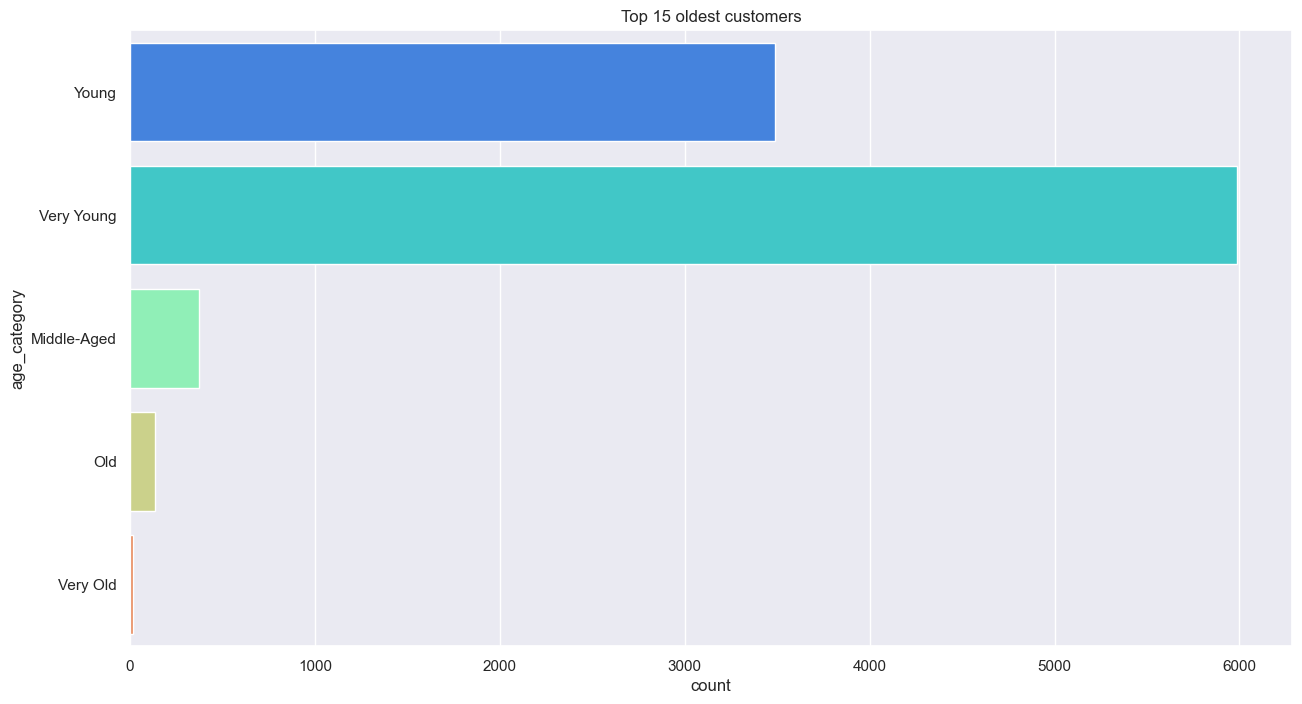

In [37]:
# Create a bar plot that displays the top 15 oldest customers from the data
plt.figure(figsize=(15,8))
sns.set(style="darkgrid") 
sns.countplot(y="age_category", data=df, palette="rainbow")
plt.title('Top 15 oldest customers')

From the count plot above, one can observe that most of the customers are very young and below the age of 40

In [38]:
# Drop the attribute "age_category"
df = df.drop({'age_category'}, axis = 1)

In [39]:
# Create 2 pie charts that display the gender and churn distributions
g_labels = ['Male', 'Female']
c_labels = [0, 1]
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['churn'].value_counts(), name="churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

From the 2 pie charts, we can see that 54.6% of the customers are males and the remaining are females

We can also see that majority of the customers did not leave the bank

In [40]:
# Find the number of male and female customers who left the bank
df["churn"][df["churn"]==1].groupby(by=df["gender"]).count()


gender
Female    1139
Male       898
Name: churn, dtype: int64

So, we can see that out of the 20.4% customers that left the bank about 1139 of them are females and the remaining are male customers.

In [41]:
# Find the number of male and female customers who did not leave the bank
df["churn"][df["churn"]==0].groupby(by=df["gender"]).count()


gender
Female    3404
Male      4559
Name: churn, dtype: int64

Out of the 70.6% of the people who did not churn, about 4559 of them are male customers and the remaining are female customers. 

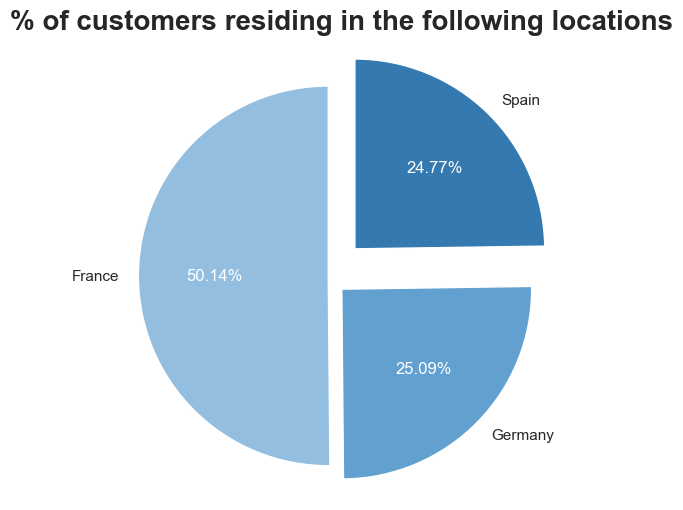

In [42]:
# Create a pie chart that displays the % of customers residing in the following locations
plt.figure(figsize=(8, 6))
labels=['France', 'Germany', 'Spain']
_, _, texts = plt.pie(df.country.value_counts()[:3], labels=labels, autopct='%1.2f%%', startangle=90, 
                      explode=(0.0, 0.1, 0.2), colors=['#93BEDF', '#62A0D0', '#347AB0'])
plt.axis('equal')
plt.title('% of customers residing in the following locations', fontsize=20, fontweight='bold');
for text in texts:
    text.set_color('white')

We can see that out of the customers who churned or did not churn, about 50 % of them are from France, 25% of them are from Germany and the remaining are from Spain. 

In [43]:
# Obtain the percentages of people who churned for each location
churned_french = df.churn[(df.country == "France") & (df.churn == 1)].count()
count_french = df.churn[df.country == "France"].count()
print("Percentage of the french customers who churned --->", churned_french*100/count_french, '%')

churned_german = df.churn[(df.country == "Germany") & (df.churn == 1)].count()
count_german = df.churn[df.country == "Germany"].count()
print("Percentage of the german customers who churned --->", churned_german*100/count_german, '%')

churned_spanish = df.churn[(df.country == "Spain") & (df.churn == 1)].count()
count_spanish = df.churn[df.country == "Spain"].count()
print("Percentage of the spanish customers who churned --->", churned_spanish*100/count_spanish, '%')

Percentage of the french customers who churned ---> 16.15476665337056 %
Percentage of the german customers who churned ---> 32.44320446392985 %
Percentage of the spanish customers who churned ---> 16.67339523617279 %


In [44]:
# Find the number of people in each location who churned
df["churn"][df["churn"]==1].groupby(by=df["country"]).count()


country
France     810
Germany    814
Spain      413
Name: churn, dtype: int64

We can see that the majority of the customers who have churned are from Germany followed by France and then Spain. 

In [45]:
# Find the number of people in each location who have not churned
df["churn"][df["churn"]==0].groupby(by=df["country"]).count()

country
France     4204
Germany    1695
Spain      2064
Name: churn, dtype: int64

We can also see that the majority of the customers who have not churned are from France followed by Spain & Germany

In [46]:
# Find the churn stats grouped by the gender, country and churn
grouped = df.groupby(['gender', 'country', 'churn'])
result = grouped.agg({'churn': 'count'})

# display the result
print(result)

                      churn
gender country churn       
Female France  0       1801
               1        460
       Germany 0        745
               1        448
       Spain   0        858
               1        231
Male   France  0       2403
               1        350
       Germany 0        950
               1        366
       Spain   0       1206
               1        182


In [47]:
# Find the total estimated salary grouped by the gender, country and churn
grouped = df.groupby(['gender', 'country', 'churn'])
result = grouped.agg({'estimated_salary': 'sum'})

# display the result
print(result)

                      estimated_salary
gender country churn                  
Female France  0          1.774468e+08
               1          4.766797e+07
       Germany 0          7.747035e+07
               1          4.474824e+07
       Spain   0          8.485676e+07
               1          2.484269e+07
Male   France  0          2.396619e+08
               1          3.611784e+07
       Germany 0          9.612250e+07
               1          3.535253e+07
       Spain   0          1.186585e+08
               1          1.795632e+07


In [48]:
# Find the average credit scores grouped by the country, gender and churn

grouped = df.groupby(['gender', 'country', 'churn'])
result = grouped.agg({'credit_score': 'mean'})

# display the result
print(result)

                      credit_score
gender country churn              
Female France  0        650.536369
               1        643.897826
       Germany 0        654.514094
               1        650.732143
       Spain   0        653.494172
               1        645.363636
Male   France  0        651.631294
               1        639.308571
       Germany 0        652.278947
               1        643.964481
       Spain   0        651.115257
               1        650.175824


In [49]:
# Obtain the average balance grouped by the gender, country & churn
grouped = df.groupby(['gender', 'country', 'churn'])
result = grouped.agg({'balance': 'mean'})

# display the result
print(result)

                            balance
gender country churn               
Female France  0       58424.310061
               1       67755.162630
       Germany 0      118828.514362
               1      119673.872321
       Spain   0       56594.820688
               1       71997.673680
Male   France  0       61774.503758
               1       75710.827800
       Germany 0      119896.529105
               1      121202.242432
       Spain   0       61871.626285
               1       73167.867802


In [50]:
# Obtain the average number of products that the customers have grouped by their gender, location and churn
grouped = df.groupby(['gender', 'country', 'churn'])
result = grouped.agg({'products_number': 'mean'})

# display the result
print(result)

                      products_number
gender country churn                 
Female France  0             1.556913
               1             1.510870
       Germany 0             1.538255
               1             1.466518
       Spain   0             1.566434
               1             1.597403
Male   France  0             1.529754
               1             1.431429
       Germany 0             1.561053
               1             1.439891
       Spain   0             1.529022
               1             1.406593


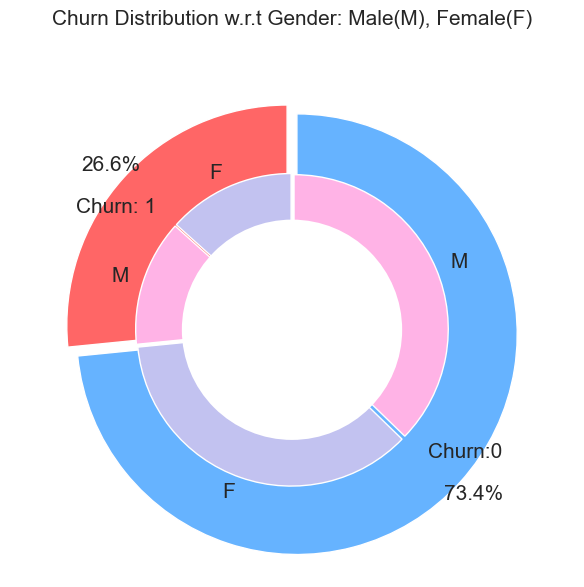

In [51]:
# Create a pie chart that displays the churn distribution with respect to gender

plt.figure(figsize=(6, 6))
labels =["Churn: 1","Churn:0"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

In [52]:
# Create a histogram displaying the customer churn with respect to gender
fig = px.histogram(df, x="churn", color="gender", barmode="group", title="<b>Customer Churn w.r.t gender<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [53]:
# Create a histogram that displays the customer churn grouped by the location
fig = px.histogram(df, x="churn", color="country", barmode="group", title="<b>Customer Churn by location<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [54]:
# Create a histogram displaying the number of active members grouped by churn
px.histogram(df, x = "active_member", color = "churn", barmode = "group", title="<b>Active Members by churn<b>")

C:\Users\User\AppData\Local\Temp\ipykernel_18020\4281017194.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\User\AppData\Local\Temp\ipykernel_18020\4281017194.py:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




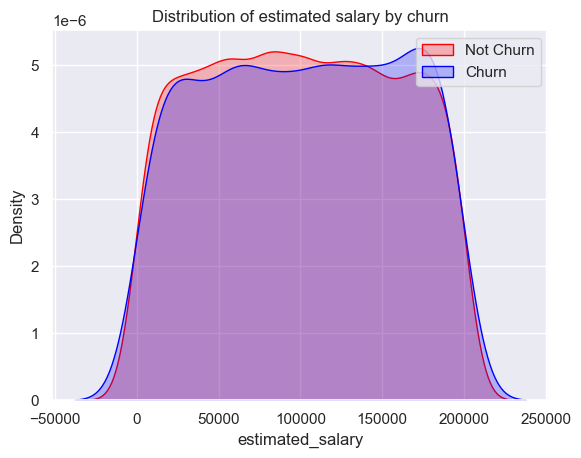

In [55]:
# Create a density plot that displays the distribution of the estimated salary by churn
ax = sns.kdeplot(df.estimated_salary[(df["churn"] == 0) ],
                color="Red", shade = True);
ax = sns.kdeplot(df.estimated_salary[(df["churn"] == 1) ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('estimated_salary');
ax.set_title('Distribution of estimated salary by churn');

Text(0.5, 1.0, 'Relationship between estimated salary and customer churn')

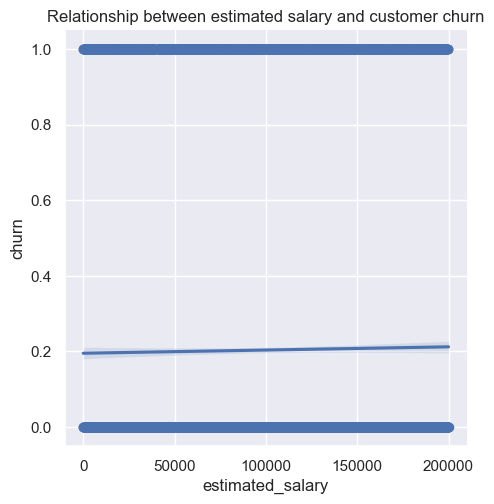

In [56]:
# Create a linear model plot displaying the relationship between tenure and churn
sns.lmplot(x = "estimated_salary", y = "churn", data = df)
plt.title("Relationship between estimated salary and customer churn")

From this linear model plot, it can be seen that there is a weak positive relationship existing between the estimated salary and churn. An increase in the estimated salary is associated with a predicted increase in the customer churn. So, this shows that the customers with high salaries are more likely to churn. 

However, there are a few possible explanations for this relationship:

Higher salaries may indicate greater financial stability and independence, which could make customers more willing to take risks and switch banks if they believe they can get a better deal elsewhere.

Customers with higher salaries may have higher expectations for the level of service and perks they receive from their bank, and if they feel that these expectations are not being met, they may be more likely to switch to a competitor.

Text(0.5, 1.0, 'Relationship between balance and customer churn')

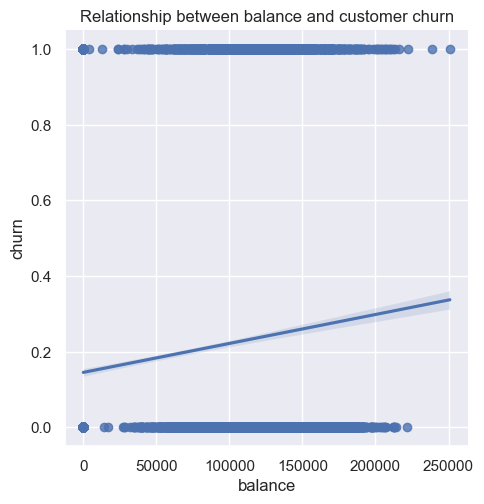

In [57]:
# Create a linear model plot to display the relationship between balance and the customer churn
sns.lmplot(x = "balance", y = "churn", data = df)
plt.title("Relationship between balance and customer churn")

From this linear model plot, it can be seen that there is a strong positive relationship existing between the balance and churn. An increase in the customer's balance is associated with a predicted increase in the linkelihood that the customer will leave the bank. 

However, there are also some other possible explanations for this relationship:

Customers with higher balances may be more sensitive to changes in interest rates or fees, and may be more likely to switch banks if they perceive that their account is not providing them with sufficient value.

Customers with higher balances may also be more likely to be targeted by other banks with attractive offers and incentives to switch, which could increase their propensity to churn.

Text(0.5, 1.0, 'Relationship between age and customer churn')

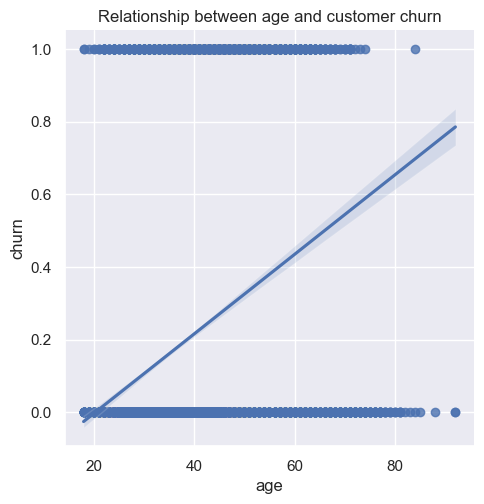

In [58]:
# Create a linear model plot displaying the relationship between age and customer churn
sns.lmplot(x = "age", y = "churn", data = df)
plt.title("Relationship between age and customer churn")

From this linear model plot, it can be seen that there is a strong positive relationship existing between the age and churn. An increase in the customer's age is associated with a predicted increase in the customer churn. So, this shows that all the older aged customers are more likely to churn. 

This positive relationship existing between "age" and "churn" suggests that older customers are more likely to churn than younger customers. 

However, there are a few possible explanations for this relationship:

Old-aged customers may have different financial needs and priorities than younger customers, and may be more likely to switch banks if they feel that their current bank is not meeting these needs.

Old-aged customers may also be more likely to experience life changes such as retirement or relocation, which could increase their propensity to switch banks.

Text(0.5, 1.0, 'Number of products vs Churn')

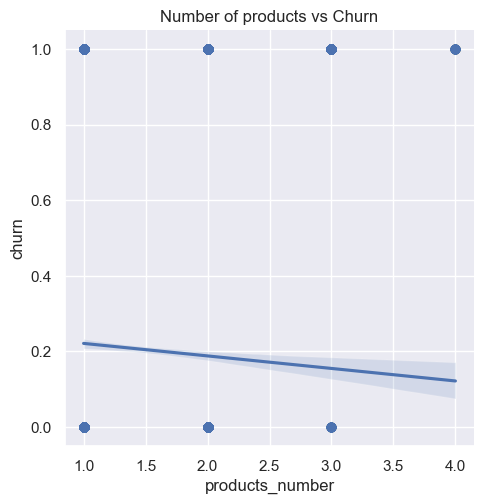

In [59]:
# Create a linear model plot displaying the relationship between the number of products that the customer has with the bank
# and customer churn
sns.lmplot(x = "products_number", y = "churn", data = df)
plt.title("Number of products vs Churn")

From this linear model plot, it can be seen that there is a negative relationship existing between the products_number and churn. An increase in the number of products that the customer has with the bank is associated with a predicted fall in the customer churn. So, this shows that the more products the customer has with a bank, less likely they are to churn. 

There are a few reasons for why there is a negative relationship existing between "products_number" & "churn":

Customers with more products may be more engaged with the bank, and may have a greater sense of loyalty and attachment to the brand.

Customers with multiple products may also be less likely to switch banks due to the inconvenience of moving all of their accounts and services to a new provider

Text(0.5, 1.0, 'Active Member vs Churn')

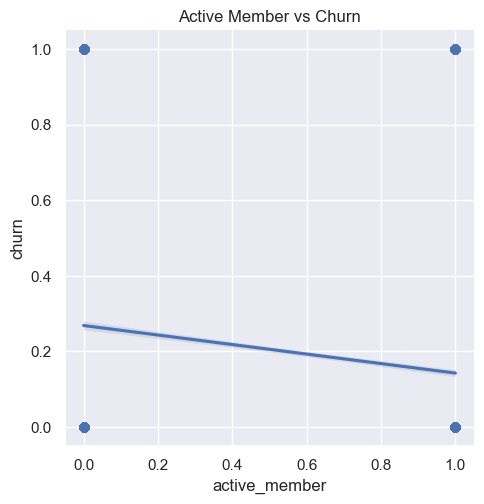

In [60]:
# Create a linear model plot to see the relationship between "active_member" & "churn"
sns.lmplot(x = "active_member", y = "churn", data = df)
plt.title("Active Member vs Churn")

From the above linear model plot, we can see that there is a negative relationship existing between the following variables "active_member" & "churn". 

This negative relationship between "active_member" and "churn" suggests that customers who are active members (meaning they frequently use the bank's services) are less likely to churn.

There are a few reasons for this negative relationship:
Active members may also have a higher level of engagement and satisfaction with the bank's services, which could lead to increased loyalty and a decreased likelihood of churn.

Customers who are not active members may be less invested in their relationship with the bank, and may be more likely to switch to another provider if they see a better offer or incentive.

Text(0.5, 1.0, 'Credit Card vs Churn')

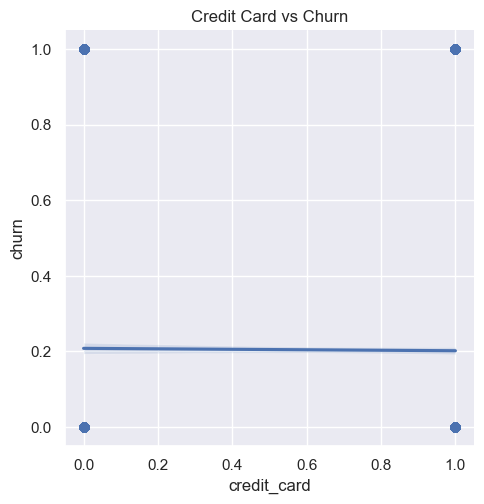

In [61]:
# Create a linear model plot to see the relationship between "number of customers with a credit card" & "churn"
sns.lmplot(x = "credit_card", y = "churn", data = df)
plt.title("Credit Card vs Churn")

From the above linear model plot, we can see that there is a weak negative relationship between "credit_card" & churn". 
This negative relationship existing between "credit_card" and "churn" suggests that customers who have a credit card with the bank are less likely to churn.

However, there are a few possible explanations for this relationship:

Customers who have a credit card with the bank may have a stronger relationship with the bank, and may be more likely to stay with the bank in order to maintain their existing credit card rewards and benefits.

Customers who have a credit card with the bank may also be more likely to have a longer history with the bank, and may be more invested in maintaining their relationship with the institution.

In [62]:
# Convert categorical features into numerical features using labelencoder
df['country'] = LabelEncoder().fit_transform(df['country'])
df['gender'] = LabelEncoder().fit_transform(df['gender'])


In [63]:
# Create a table consisting of the correlation coefficients
data = df.corr()
data

credit_score   country    gender       age    tenure  \
credit_score          1.000000  0.007888 -0.002857 -0.003965  0.000842   
country               0.007888  1.000000  0.004719  0.022812  0.003739   
gender               -0.002857  0.004719  1.000000 -0.027544  0.014733   
age                  -0.003965  0.022812 -0.027544  1.000000 -0.009997   
tenure                0.000842  0.003739  0.014733 -0.009997  1.000000   
balance               0.006268  0.069408  0.012087  0.028308 -0.012254   
products_number       0.012238  0.003972 -0.021859 -0.030680  0.013444   
credit_card          -0.005458 -0.008523  0.005766 -0.011721  0.022583   
active_member         0.025651  0.006724  0.022544  0.085472 -0.028362   
estimated_salary     -0.001384 -0.001369 -0.008112 -0.007201  0.007784   
churn                -0.027094  0.035943 -0.106512  0.285323 -0.014001   

                   balance  products_number  credit_card  active_member  \
credit_score      0.006268         0.012238    -0.005458       0.025651   
country           0.069408         0.003972    -0.008523       0.006724   
gender            0.012087        -0.021859     0.005766       0.022544   
age               0.028308        -0.030680    -0.011721       0.085472   
tenure           -0.012254         0.013444     0.022583      -0.028362   
balance           1.000000        -0.304180    -0.014858      -0.010084   
products_number  -0.304180         1.000000     0.003183       0.009612   
credit_card      -0.014858         0.003183     1.000000      -0.011866   
active_member    -0.010084         0.009612    -0.011866       1.000000   
estimated_salary  0.012797         0.014204    -0.009933      -0.011421   
churn             0.118533        -0.047820    -0.007138      -0.156128   

                  estimated_salary     churn  
credit_score             -0.001384 -0.027094  
country                  -0.001369  0.035943  
gender                   -0.008112 -0.106512  
age                      -0.007201  0.285323  
tenure                    0.007784 -0.014001  
balance                   0.012797  0.118533  
products_number           0.014204 -0.047820  
credit_card              -0.009933 -0.007138  
active_member            -0.011421 -0.156128  
estimated_salary          1.000000  0.012097  
churn                     0.012097  1.000000

Text(0.5, 1.0, 'Bank Customer Churn Correlations')

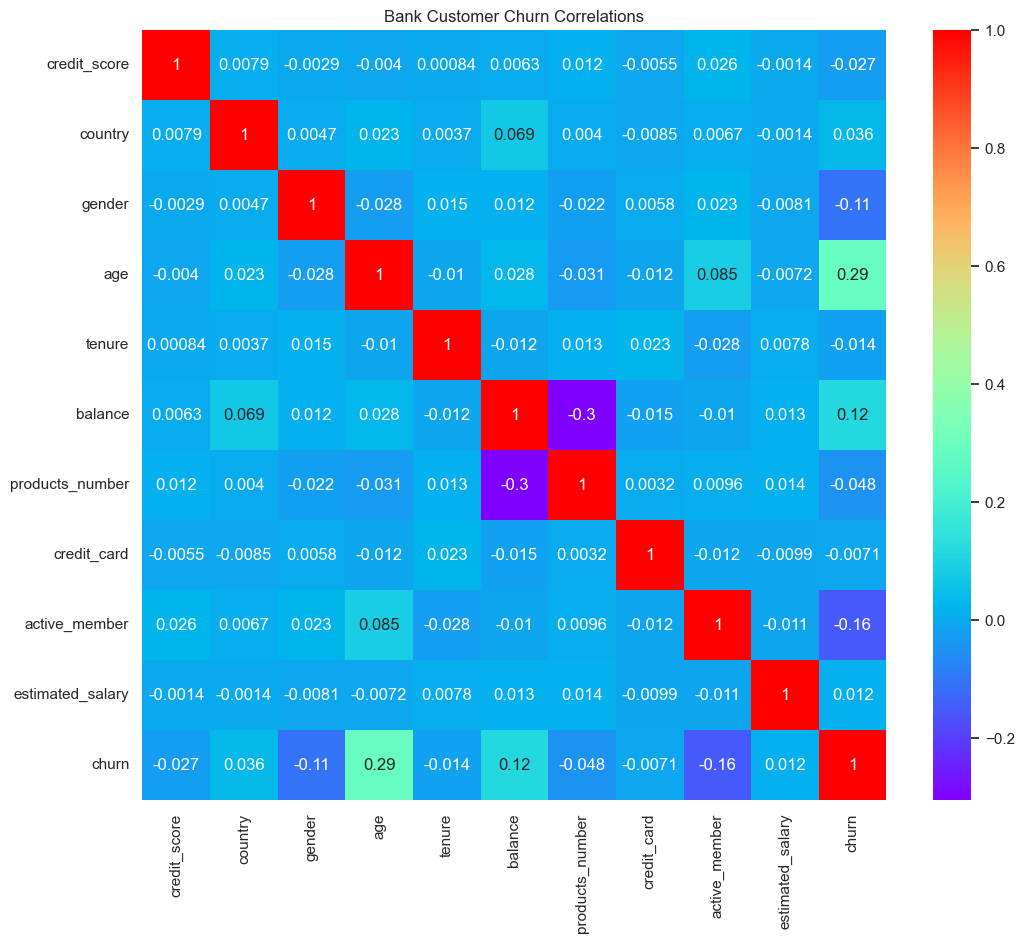

In [64]:
# Create a correlation heatmap
plt.figure(figsize = (12, 10))
sns.heatmap(data = df.corr(), annot = True, cmap = 'rainbow')
plt.title("Bank Customer Churn Correlations")

### Pairplot

A pairplot is a type of visualization that displays pairwise relationships between variables in a dataset. It typically shows scatterplots of all possible pairs of variables along with their corresponding histograms on the diagonal. This can be useful for understanding the correlation between variables, identifying potential outliers, and exploring patterns in the data.

A pairplot could be very useful for analyzing the relationships between the numerical attributes in this dataset. For example, it could help to answer questions such as:

Are there any variables that are strongly correlated with each other?
Are there any outliers or unusual patterns in the data?
Are there any variables that appear to be related to customer churn?


<Figure size 1000x800 with 0 Axes>

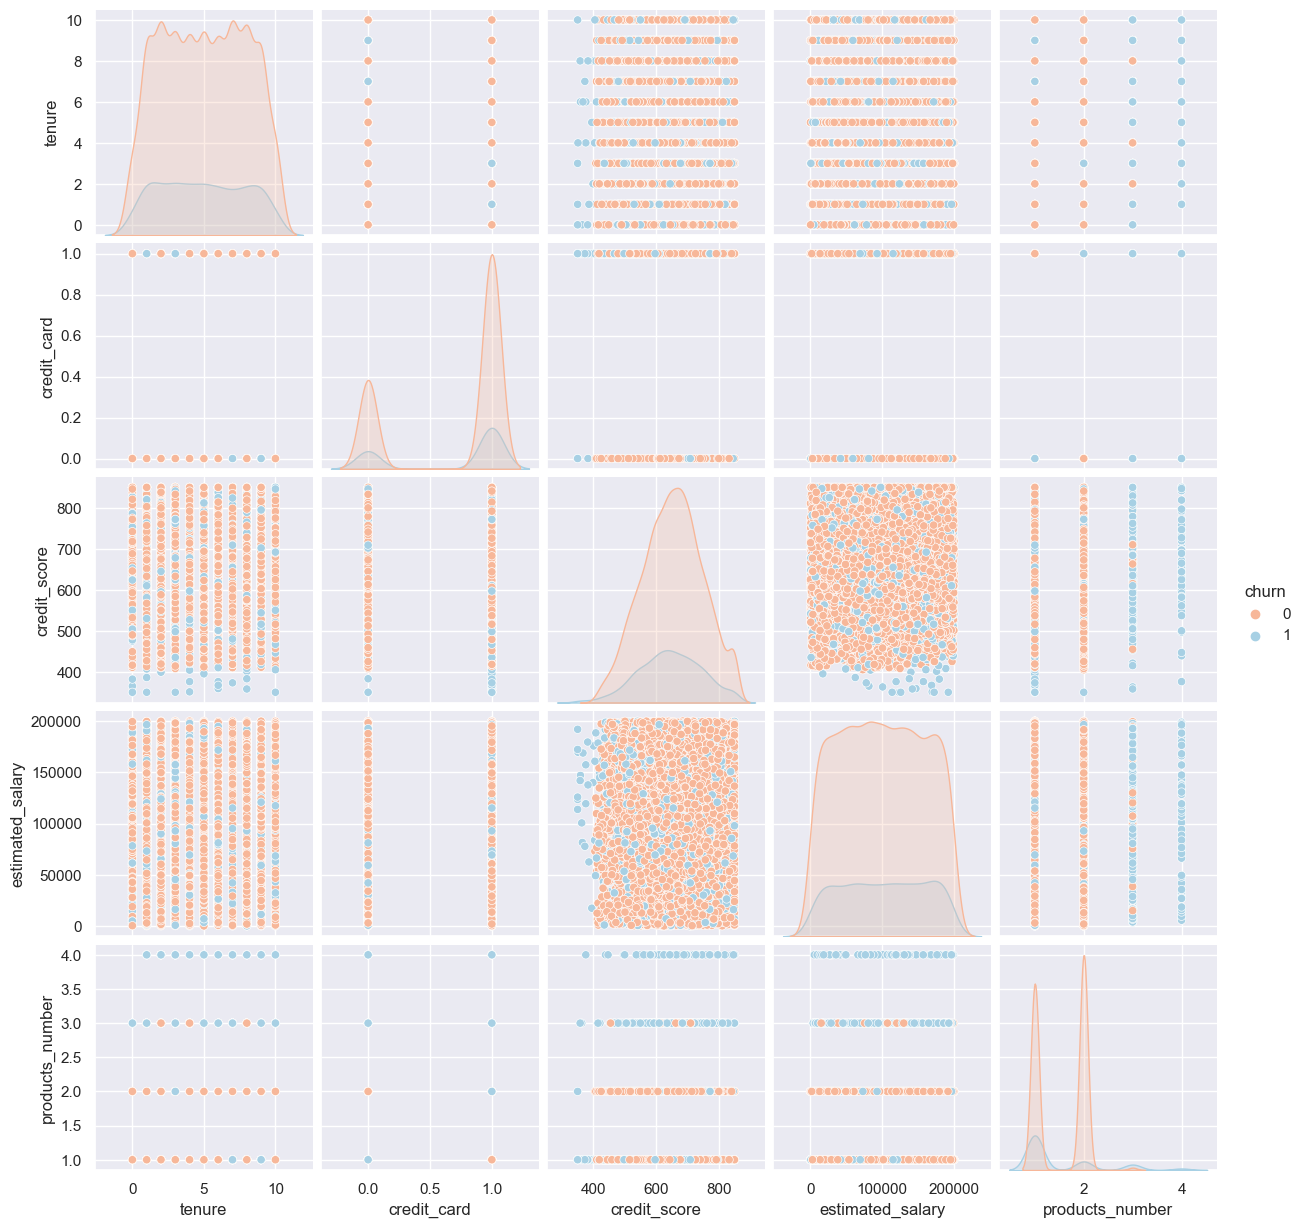

In [65]:
# Create a pairplot only for select attributes
plt.figure(figsize = (10, 8))
select_df = df.copy()[["tenure", "credit_card", "credit_score", "estimated_salary", "products_number", "churn"]]
sns.pairplot(select_df, hue = "churn", palette = "RdBu")

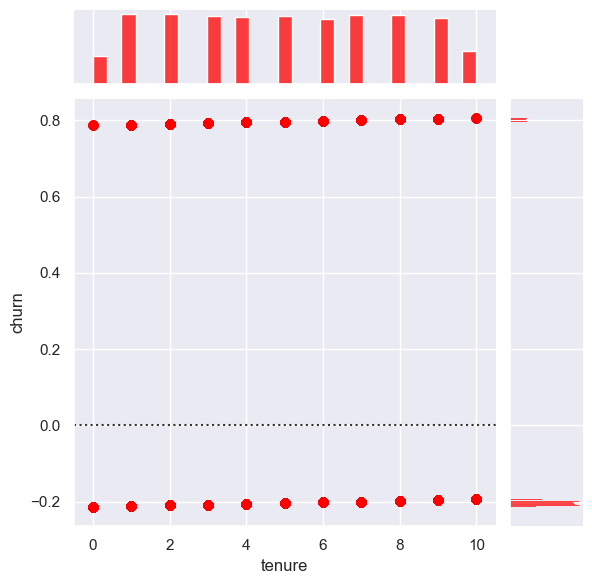

In [66]:
# Jointplot - A jointplot is a type of visualization used to show the relationship between two variables, typically through a scatterplot with marginal histograms or density plots. It is a useful tool for exploring the relationship between two continuous variables.

# You can use a jointplot to explore the relationship between any two variables, and it is particularly useful when you are interested in visualizing the joint distribution of two variables and the marginal distributions of each variable separately.

# Create a jointplot between tenure and churn
sns.jointplot(x = "tenure", y = "churn", data = df, kind = "resid", color = 'red');

This jointplot indicates that there is a negative relationship between tenure and churn. From this we can understand that customers with higher tenure were less likely to churn. 

## Linear Regression

In [67]:
# Use linear regression method to exactly know the relation between the attributes 'age' & 'churn'
# create a fitted model
lm1 = smf.ols(formula='churn ~ age', data = df).fit()

In [68]:
lm1.conf_int()

0         1
Intercept -0.251868 -0.193696
age        0.010236  0.011679

In [69]:
# Obtain the summary of this linear model
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  churn   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     886.1
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          1.24e-186
Time:                        15:00:25   Log-Likelihood:                -4670.4
No. Observations:               10000   AIC:                             9345.
Df Residuals:                    9998   BIC:                             9359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2228      0.015    -15.014      0.000      -0.252      -0.194
age            0.0110      0.000     29.767      0.000       0.010       0.012
==============================================================================
Omnibus:                     1669.435   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2669.513
Skew:                           1.262   Prob(JB):                         0.00
Kurtosis:                       3.183   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Coefficient Interpretation: The coefficient on the variable age implies that an increase in the customer's age is associated with a predicted rise in the likelihood that the customer will leave the bank/churn. 

Multiple R-Squared Interpretation: The interpretation of this R-squared is that this model explains about 8.1% of the variation in the customer churn. 

Confidence Interval Interpretation: With 95% confidence, one can say that this variable "age" would most likely fall between the lower limit 0.010 and the upper limit 0.012

In [70]:
# Use the linear regression method to determine the relationship between the number of products that the customer has with the bank 
# and the churn
lm2 = smf.ols(formula='churn ~ products_number', data = df).fit()

In [71]:
# Obtain a summary of the above model
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  churn   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     22.92
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           1.72e-06
Time:                        15:00:25   Log-Likelihood:                -5083.5
No. Observations:               10000   AIC:                         1.017e+04
Df Residuals:                    9998   BIC:                         1.019e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.2544      0.011     22.463      0.000       0.232       0.277
products_number    -0.0331      0.007     -4.787      0.000      -0.047      -0.020
==============================================================================
Omnibus:                     2041.718   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3611.996
Skew:                           1.470   Prob(JB):                         0.00
Kurtosis:                       3.174   Cond. No.                         6.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Coefficient Interpretation: The coefficient on the variable products_number implies that an increase in the number of products that the customer has with the bank is associated with a predicted fall in the likelihood that the customer will leave the bank/churn. 

Multiple R-Squared Interpretation: The interpretation of this R-squared is that this model explains about 0.2% of the variation in the customer churn. 

Confidence Interval Interpretation: With 95% confidence, one can say that this variable "products_number" would most likely fall between the lower limit -0.047 and the upper limit -0.020. 

In [72]:
# Check the relationship between the variables "active member" & "churn"
lm3 = smf.ols(formula='churn ~ active_member', data = df).fit()

In [73]:
# Obtain the summary for this model
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  churn   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     249.8
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           1.35e-55
Time:                        15:00:25   Log-Likelihood:                -4971.6
No. Observations:               10000   AIC:                             9947.
Df Residuals:                    9998   BIC:                             9962.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.2685      0.006     46.997      0.000       0.257       0.280
active_member    -0.1258      0.008    -15.805      0.000      -0.141      -0.110
==============================================================================
Omnibus:                     1942.980   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3350.315
Skew:                           1.416   Prob(JB):                         0.00
Kurtosis:                       3.155   Cond. No.                         2.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Coefficient Interpretation: The coefficient on the variable active_member implies that an additional active member of the bank is associated with a predicted fall in the likelihood that the customer will leave the bank/churn. 

Multiple R-Squared Interpretation: The interpretation of this R-squared is that this model explains about 2.4% of the variation in the customer churn. 

Confidence Interval Interpretation: With 95% confidence, one can say that this variable "products_number" would most likely fall between the lower limit -0.141 and the upper limit -0.110. 

In [74]:
# Create a multiple linear regression model to test if the varaibles age and tenure are considered to be good predictors of churn
lm4 = smf.ols(formula='churn ~ age + tenure', data = df).fit()

In [75]:
# Obtain the summary of this model
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  churn   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     443.7
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          2.35e-185
Time:                        15:00:25   Log-Likelihood:                -4669.7
No. Observations:               10000   AIC:                             9345.
Df Residuals:                    9997   BIC:                             9367.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2148      0.016    -13.150      0.000      -0.247      -0.183
age            0.0110      0.000     29.754      0.000       0.010       0.012
tenure        -0.0016      0.001     -1.163      0.245      -0.004       0.001
==============================================================================
Omnibus:                     1669.372   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2669.311
Skew:                           1.262   Prob(JB):                         0.00
Kurtosis:                       3.184   Cond. No.                         172.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Coefficient Interpretation: The coefficient on the variable age implies that an increase in the customer's age is associated with a predicted rise in the likelihood that the customer will leave the bank/churn. Whereas the coefficient on the variable "tenure" implies that an additional year the customer has an account with the bank, the less likely they are going to leave the bank/churn.  

Multiple R-Squared Interpretation: The interpretation of this R-squared is that both the explanatory variables "age" & "tenure explain about 8.2% of the variation in the customer churn. 

Confidence Interval Interpretation: With 95% confidence, one can say that this variable "tenure" would most likely fall between the lower limit -0.004 and the upper limit -0.001. 

With 95% confidence, one can say that this variable "age" would most likely fall between the lower limit 0.010 and the upper limit 0.012.


In [76]:
# Test the relationship between balance and churn
lm5 = smf.ols(formula='churn ~ balance', data = df).fit()

In [77]:
# Obtain the summary of the model
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  churn   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     142.5
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           1.28e-32
Time:                        15:00:25   Log-Likelihood:                -5024.2
No. Observations:               10000   AIC:                         1.005e+04
Df Residuals:                    9998   BIC:                         1.007e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1452      0.006     22.945      0.000       0.133       0.158
balance     7.651e-07   6.41e-08     11.936      0.000    6.39e-07    8.91e-07
==============================================================================
Omnibus:                     1983.501   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3457.769
Skew:                           1.438   Prob(JB):                         0.00
Kurtosis:                       3.154   Cond. No.                     1.56e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Coefficient Interpretation: The coefficient on the variable balance implies that an increase in the customer's balance is associated with a predicted rise in the likelihood that the customer will leave the bank/churn. 

Multiple R-Squared Interpretation: The interpretation of this R-squared is that the models explain about 1.4% of the variation in the customer churn. 

Confidence Interval Interpretation: With 95% confidence, one can say that this variable "balance" would most likely fall between the lower limit 6.39e-07 and the upper limit 8.91e-07. 

In [78]:
# Test the relationship between credit score and churn
lm6 = smf.ols(formula='churn ~ credit_score', data = df).fit()

In [79]:
# Obtain the summary of the model
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  churn   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     7.345
Date:                Thu, 27 Apr 2023   Prob (F-statistic):            0.00674
Time:                        15:00:26   Log-Likelihood:                -5091.3
No. Observations:               10000   AIC:                         1.019e+04
Df Residuals:                    9998   BIC:                         1.020e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.2771      0.027     10.115      0.000       0.223       0.331
credit_score    -0.0001   4.17e-05     -2.710      0.007      -0.000   -3.12e-05
==============================================================================
Omnibus:                     2041.209   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3612.134
Skew:                           1.470   Prob(JB):                         0.00
Kurtosis:                       3.165   Cond. No.                     4.48e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Coefficient Interpretation: The coefficient on the variable balance implies that an increase in the customer's credit score is associated with a predicted fall in the likelihood that the customer will leave the bank/churn. 

Multiple R-Squared Interpretation: The interpretation of this R-squared is that the model explain about 0.1% of the variation in the customer churn. 

Confidence Interval Interpretation: With 95% confidence, one can say that this variable "balance" would most likely fall between the lower limit -0.000 and the upper limit -31.12*10^-5. 

In [80]:
lm7 = smf.ols(formula='churn ~ credit_card', data = df).fit()

In [81]:
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  churn   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5094
Date:                Thu, 27 Apr 2023   Prob (F-statistic):              0.475
Time:                        15:00:26   Log-Likelihood:                -5094.7
No. Observations:               10000   AIC:                         1.019e+04
Df Residuals:                    9998   BIC:                         1.021e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2081      0.007     28.045      0.000       0.194       0.223
credit_card    -0.0063      0.009     -0.714      0.475      -0.024       0.011
==============================================================================
Omnibus:                     2043.753   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3619.106
Skew:                           1.471   Prob(JB):                         0.00
Kurtosis:                       3.165   Cond. No.                         3.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Coefficient Interpretation: The coefficient on the variable credit_card implies that an increase in the customers having credit cards is associated with a predicted fall in the likelihood that the customer will leave the bank/churn. 

## Modelling



A train-test model is a technique used in machine learning to evaluate the performance of a predictive model. The dataset is split into two parts: a training set and a testing set. The training set is used to train the model, and the testing set is used to evaluate the model's performance.

The purpose of using a train-test model is to estimate the model's ability to generalize to new data, which is data that the model has not seen before. By evaluating the model's performance on a testing set, we can get an estimate of how well the model will perform on new, unseen data.

The target variable that the model is trying to predict is "churn". 

Once the model has been trained, you would then evaluate its performance on the testing set. The evaluation metrics that could be used to evaluate the model's performance include accuracy, precision, recall, and F1-score.

The purpose of the train-test model in this context is to create a predictive model that can accurately predict whether a bank customer is likely to churn or not. By accurately predicting customer churn, the bank can take proactive measures to retain customers and reduce customer churn, which can ultimately lead to increased profits.

In [82]:
# We will be splitting the clean data into 2. We will consider the test size to be 0.2 where 80% of it will be used for training 
# the data and the remaining 20% of it will be used for testing the data. 

# The training set would contain 80% of the data and be used to train the model to predict customer churn, while the testing set would contain the remaining 20% of the data and be used to evaluate the model's performance.


from sklearn.model_selection import train_test_split
X = df.copy();
X.drop('churn',axis = 1,inplace = True)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## Support Vector Machine Learning Algorithm

The SVM algorithm works by finding a hyperplane that best separates the data into different classes. In the case of a binary classification problem like the bank customer churn dataset, SVM tries to find a hyperplane that separates the data into two classes: churn and no churn.

To apply the SVM algorithm to the bank customer churn dataset, we would need to first preprocess the data by encoding categorical variables, such as gender and country, into numerical variables. We would then split the data into training and testing sets and train the SVM model on the training set.

The SVM algorithm requires a choice of a kernel function, which is a function that maps the input data into a higher-dimensional space, where it is easier to find a separating hyperplane.

Once the model is trained, you would then evaluate its performance on the testing set using appropriate evaluation metrics such as accuracy, precision, recall, and F1-score.

SVM can be a good choice for this dataset because it can handle high-dimensional data, and it is effective in finding a separating hyperplane in cases where the data may not be linearly separable. SVM can also handle imbalanced datasets, which may be the case in this dataset, where the number of churn customers may be much smaller than the number of non-churn customers.

These are the steps involved in implementing this algorithm:

Split the dataset into training and testing sets using the train-test split function provided by the machine learning library.

Create an instance of the SVM model, specifying the kernel function and other hyperparameters, such as regularization parameter and kernel coefficient.

Train the SVM model on the training set using the fit function provided by the machine learning library.

Use the trained SVM model to predict the target variable on the testing set using the predict function.

Evaluate the performance of the SVM model on the testing set using appropriate evaluation metrics such as accuracy, precision, recall, and F1-score.

In [83]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset into memory
# Preprocess the data, such as encoding categorical variables into numerical variables
# Split the dataset into training and testing sets using the train-test split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the SVM model, specifying the kernel function and other hyperparameters
clf = svm.SVC(kernel='rbf', C=1.0, gamma='scale')

# Train the SVM model on the training set
clf.fit(X_train, y_train)

# Use the trained SVM model to predict the target variable on the testing set
y_pred = clf.predict(X_test)

# Evaluate the performance of the SVM model on the testing set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8035


In [84]:
# Print the classification report for this model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Accuracy: It is the proportion of correct predictions out of the total number of predictions. In this case, the accuracy is 0.80 or 80%. It means that 80% of the predictions made by the SVM model are correct.

Precision: It is the proportion of true positive predictions (correctly predicted churn customers) out of the total number of positive predictions (all predicted churn customers). In this case, the precision for class 0 is 0.80, meaning that 80% of the predicted non-churn customers are actually non-churn. The precision for class 1 is 0.00, which means that the model did not predict any true positive churn customers.

Recall: It is the proportion of true positive predictions out of the total number of actual positive instances (the actual churn customers). In this case, the recall for class 0 is 1.00, meaning that the model correctly predicted all non-churn customers. The recall for class 1 is 0.00, meaning that the model did not predict any true positive churn customers.

F1-score: It is a weighted harmonic mean of precision and recall. It provides a balance between precision and recall, where the F1-score is 1.0 for a perfect precision and recall and 0.0 for the worst. In this case, the F1-score for class 0 is 0.89, meaning that there is a good balance between precision and recall for non-churn customers. The F1-score for class 1 is 0.00, indicating that there is no balance between precision and recall for churn customers.

Overall, the results indicate that the SVM model has a high accuracy for predicting non-churn customers but performs poorly in predicting churn customers. The model has a high precision but low recall for non-churn customers, meaning that it can accurately predict non-churn customers but may miss some churn customers. However, the model has a low precision and recall for churn customers, indicating that it needs further improvement to correctly identify churn customers.

## Logistic Regression

Logistic Regression is a statistical algorithm used to predict the probability of a binary outcome based on one or more predictor variables. In simple terms, it models the relationship between the dependent variable (binary) and one or more independent variables (continuous or categorical) using a logistic function.

For the bank customer churn dataset, logistic regression can be used to predict the probability of a customer leaving the bank (churn=1) based on their attributes such as estimated_salary, tenure, age, gender, country, products_number, and credit_card.

Logistic regression is suitable for this dataset because it can handle both categorical and continuous variables, and can output a probability score which can be used to make binary predictions. It can also provide insights into the relative importance of each predictor variable in predicting the outcome.

To apply logistic regression to the dataset, the first step is to split the dataset into training and testing sets. Then, the logistic regression model can be trained on the training set using the independent variables to predict the dependent variable. Finally, the trained model can be evaluated on the testing set to assess its performance.

The logistic regression algorithm works by estimating the coefficients of the independent variables in a logistic function using a method called maximum likelihood estimation. The logistic function maps the linear combination of the coefficients and independent variables to a probability value between 0 and 1, which is then used to make binary predictions. The coefficients can be interpreted as the change in the log odds of the outcome for a one-unit change in the corresponding independent variable, holding other variables constant.

Import the necessary libraries and load the dataset.

Split the dataset into training and testing sets.

Create a logistic regression model object.

Train the logistic regression model on the training set using the independent variables to predict the dependent variable "churn".

Use the trained model to make predictions on the testing set.

Evaluate the performance of the model using evaluation metrics such as accuracy, precision, recall, and F1-score.

In [85]:
# Import libraries and load dataset
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd


# Split dataset into training and testing sets
X = df.drop('churn', axis=1) # independent variables
y = df['churn'] # dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model object
logreg = LogisticRegression()

# Train the logistic regression model on the training set
logreg.fit(X_train, y_train)

# Use the trained model to make predictions on the testing set
y_pred = logreg.predict(X_test)

# Evaluate the performance of the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))

Accuracy: 0.8005
Precision: 0.45161290322580644
Recall: 0.07124681933842239
F1-score: 0.12307692307692307


In [86]:
# Print the classification report for this model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.45      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000



Accuracy: The percentage of correctly classified instances over the total number of instances. It measures the overall performance of the model.

Precision: The proportion of true positives among the total number of predicted positives. It measures the exactness or quality of the positive predictions.

Recall: The proportion of true positives among the total number of actual positives. It measures the completeness or quantity of the positive predictions.

F1-score: The harmonic mean of precision and recall. It provides a balanced measure of precision and recall.

In the case of the logistic regression algorithm results you provided, the model has an accuracy of 0.80, which means that it correctly classified 80% of the instances in the test set. The precision for class 0 (not churned) is 0.81, which means that among all the instances predicted as not churned, 81% were actually not churned. The precision for class 1 (churned) is 0.45, which means that among all the instances predicted as churned, only 45% were actually churned. The recall for class 0 is 0.98, which means that among all the actual instances of not churned, 98% were correctly classified as not churned. The recall for class 1 is 0.07, which means that among all the actual instances of churned, only 7% were correctly classified as churned. Finally, the F1-score for class 0 is 0.89 and for class 1 is 0.12, indicating that the model's predictions for class 0 are more accurate than for class 1.

Therefore, based on these results, it seems that the logistic regression model is better at predicting class 0 (not churned) than class 1 (churned).

In summary, the logistic regression model has good performance in correctly identifying non-churners, but poor performance in correctly identifying churners. This can be seen from the low recall and F1-score for class 1.

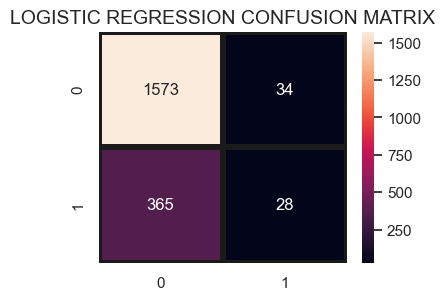

In [87]:
# Create a confusion matrix for this algorithm
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

## K-Nearest Neighbors

The K-nearest neighbors (K-NN) algorithm is a non-parametric machine learning algorithm used for classification and regression tasks. Given a new data point, it identifies the K nearest data points in the training set and assigns the new data point the class or value of the majority of its K-nearest neighbors.

To apply the K-NN algorithm to this dataset, we first need to split the data into training and testing sets. Then, we can normalize the numeric features to have a mean of 0 and a standard deviation of 1 to prevent features with larger ranges from dominating the distance metric. Next, we can choose a value of K and compute the distances between the new data point and all the training data points. Finally, we can assign the new data point the class or value of the majority of its K-nearest neighbors.

The K-NN algorithm can be used for this dataset because it does not require any assumptions about the underlying distribution of the data and can handle both binary and multi-class classification problems. Additionally, it is a simple and interpretable algorithm that does not require training time, making it useful for real-time predictions.

The objective of using the K-NN algorithm for this particular dataset is to predict whether a customer will churn or not based on their demographic and behavioral attributes. The algorithm can help identify patterns in the data that are predictive of customer churn and provide insights into which customers are at the highest risk of leaving the bank. This information can be used to design targeted retention strategies and improve customer satisfaction.

In [88]:
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the K-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier using the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

In [89]:
# Print the classification report for this model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86      1607
           1       0.24      0.09      0.14       393

    accuracy                           0.76      2000
   macro avg       0.52      0.51      0.50      2000
weighted avg       0.70      0.76      0.72      2000



Interpretation of the results for the KNN model:

The accuracy of the model is 76%, which means that 76% of the predictions made by the model on the test data were correct.

The precision for the positive class (churn=1) is 24%, which means that only 24% of the customers who were predicted to churn actually churned.

The recall for the positive class is 9%, which means that only 9% of the actual churned customers were correctly identified by the model.

The F1-score for the positive class is 14%, which is a harmonic mean of precision and recall.

Overall, from the results one can understand that the KNN model appears to have relatively low precision and recall, indicating that it may not be the best algorithm for this dataset.

## Important Observations

* Age has the highest positive correlation (29%) with the Churned Customers. Hence we can say that older customers are more likely to churn than the younger ones.
* Females have churned more than Males.
* Customers with credit card have churned lesser than the people who do not have it and the ones with a higher number of products with the bank are much less likely to churn. 
* People who are active member of bank have churned less than those who are not.
* Credit Score and Estimated Salary are almost same for both churned and not churned people.
* The percent of French customers churned is least and that of German customers is the most.
* There is a negative correlation between tenure and churn. So, this means that a customer who has been with a bank for many years is much less likely to churn. 
* Out of the 3 machine learning algorithms [SVM, Logistic Regression & KNN], both the SVM & Logistic Regression models seem to be very good models in predicting the customers that did not churn as compared to the ones that did churn based on the accuracy scores and the other metrics such as precision and recall score. 

## Effective Strategies to reduce churn

These are some of the effective strategies that the bank could adopt to reduce the churn and improve the retention:
    
Improve customer experience: The bank should focus on providing an enjoyable experience for its customers by making banking easy, convenient and hassle-free. This can be achieved by improving the online banking platform, offering personalized services, and providing quick and efficient customer service.

Offer incentives and rewards: The bank can offer incentives and rewards to its customers for staying with the bank, such as cashback rewards, loyalty points, or exclusive offers. This can encourage customers to continue using the bank's products and services.

Communicate regularly: The bank should communicate regularly with its customers to keep them informed about new products, services, and promotions. This can be done through emails, newsletters, and social media.

Provide financial education: The bank can offer financial education programs to help its customers make informed decisions about their finances. This can be done through workshops, webinars, and online resources.

